<a href="https://colab.research.google.com/github/sahmel/Deep_Learning_Models/blob/master/NLP_Shakespeare_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-06-05 16:34:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-05 16:34:58 (81.6 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(512, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 1024)          2510848   
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 1024)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 512)               2623488   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              1647243   
Total params: 7,365,335
Trainable params: 7,365,335
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.8062 - accuracy: 0.0218
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4697 - accuracy: 0.0264
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2945 - accuracy: 0.0322
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1466 - accuracy: 0.0366
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0075 - accuracy: 0.0418
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8741 - accuracy: 0.0457
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 5.7490 - accuracy: 0.0486
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.6194 - accuracy: 0.0519
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 5.4837 - accuracy: 0.0581
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 5.346

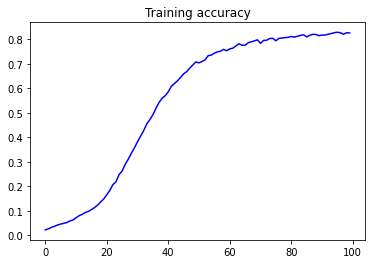

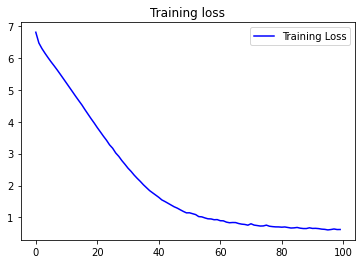

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope in thee alone in thee me so live be sort well bring thee thee convertest thee thee so live again into the same love thee hence thee thee ' a due so men ill bold can show of both me bright thee so back bright me green thee so eyes you live so eyes can you can see thee back so me be live still live so eyes can see thee hence not so gone me to me being me can say a 'will' of time and thee back so ' so lie me me and thee convertest me '
